In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
from sklearn import model_selection
from keras import models, layers

In [11]:
data = pd.read_csv('international-airline-passengers.csv')

In [12]:
data.head()

,Month,passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [13]:
data.shape

(146, 2)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 2 columns):
Month         145 non-null object
passengers    144 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


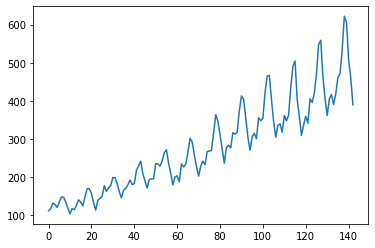

In [16]:
dataset = pandas.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
plt.plot(dataset)
plt.show()

In [17]:
#Data cleansing

In [20]:
columns_to_keep = ['passengers']
data = data[columns_to_keep]
data['passengers'] = data['passengers'].apply(lambda x: x*1000)
data.index.names = ['Month']
data.sort_index(inplace=True)
print('Total rows: {}'.format(len(data)))
data.head()

Total rows: 146


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,passengers
Month,
0,112000.0
1,118000.0
2,132000.0
3,129000.0
4,121000.0


In [21]:
data.describe()

,passengers
count,144.000000
mean,280298.611111
std,119966.316943
min,104000.000000
25%,180000.000000
50%,265500.000000
75%,360500.000000
max,622000.000000


In [23]:
data.isnull().sum()

passengers    2
dtype: int64

In [24]:
null_columns=data.columns[data.isnull().any()]
data[null_columns].isnull().sum()

passengers    2
dtype: int64

In [25]:
print(data[data.isnull().any(axis=1)][null_columns].head())

       passengers
Month            
144           NaN
145           NaN


In [26]:
data.dropna(inplace=True)

In [27]:
data.isnull().sum()

passengers    0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F23F902710>]],
      dtype=object)

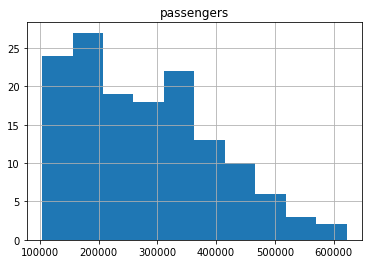

In [28]:
data.hist(bins=10)

In [30]:
len(data[data['passengers'] == 0])

0

In [31]:
#Scaled data

In [32]:
print('Min', np.min(data))
print('Max', np.max(data))

Min passengers    104000.0
dtype: float64
Max passengers    622000.0
dtype: float64


In [33]:
dataset = data.astype('float32')

In [34]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(dataset)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype float32 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [35]:
print('Min', np.min(scaled))
print('Max', np.max(scaled))

Min 0.0
Max 1.0


In [36]:
print(scaled[:10])

[[0.01544402]
 [0.02702703]
 [0.05405405]
 [0.04826255]
 [0.03281853]
 [0.05984556]
 [0.08494208]
 [0.08494208]
 [0.06177606]
 [0.02895753]]


In [37]:
#Create the RNN

In [38]:
train_size = int(len(scaled) * 0.70)
test_size = len(scaled - train_size)
train, test = scaled[0:train_size, :], scaled[train_size: len(scaled), :]
print('train: {}\ntest: {}'.format(len(train), len(test)))

train: 100
test: 44


In [39]:
def create_dataset(dataset, look_back=1):
    print(len(dataset), look_back)
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        print(i)
        print('X {} to {}'.format(i, i+look_back))
        print(a)
        print('Y {}'.format(i + look_back))
        print(dataset[i + look_back, 0])
        dataset[i + look_back, 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [40]:
look_back = 1
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

100 1
0
X 0 to 1
[0.01544402]
Y 1
0.02702702702702703
1
X 1 to 2
[0.02702703]
Y 2
0.05405405405405403
2
X 2 to 3
[0.05405405]
Y 3
0.04826254826254825
3
X 3 to 4
[0.04826255]
Y 4
0.03281853281853281
4
X 4 to 5
[0.03281853]
Y 5
0.05984555984555981
5
X 5 to 6
[0.05984556]
Y 6
0.08494208494208491
6
X 6 to 7
[0.08494208]
Y 7
0.08494208494208491
7
X 7 to 8
[0.08494208]
Y 8
0.06177606177606179
8
X 8 to 9
[0.06177606]
Y 9
0.028957528957528955
9
X 9 to 10
[0.02895753]
Y 10
0.0
10
X 10 to 11
[0.]
Y 11
0.02702702702702703
11
X 11 to 12
[0.02702703]
Y 12
0.02123552123552122
12
X 12 to 13
[0.02123552]
Y 13
0.04247104247104247
13
X 13 to 14
[0.04247104]
Y 14
0.07142857142857142
14
X 14 to 15
[0.07142857]
Y 15
0.05984555984555981
15
X 15 to 16
[0.05984556]
Y 16
0.04054054054054054
16
X 16 to 17
[0.04054054]
Y 17
0.08687258687258684
17
X 17 to 18
[0.08687259]
Y 18
0.1274131274131274
18
X 18 to 19
[0.12741313]
Y 19
0.1274131274131274
19
X 19 to 20
[0.12741313]
Y 20
0.10424710424710423
20
X 20 to 21
[0.

In [41]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_train.shape)
print(X_test.shape)

(98, 1, 1)
(42, 1, 1)


In [42]:
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=batch_size, verbose=2, shuffle=True)


Epoch 1/100
 - 2s - loss: 0.0304
Epoch 2/100
 - 0s - loss: 0.0166
Epoch 3/100
 - 0s - loss: 0.0157
Epoch 4/100
 - 0s - loss: 0.0145
Epoch 5/100
 - 0s - loss: 0.0134
Epoch 6/100
 - 0s - loss: 0.0132
Epoch 7/100
 - 0s - loss: 0.0119
Epoch 8/100
 - 0s - loss: 0.0115
Epoch 9/100
 - 0s - loss: 0.0100
Epoch 10/100
 - 0s - loss: 0.0092
Epoch 11/100
 - 0s - loss: 0.0079
Epoch 12/100
 - 0s - loss: 0.0085
Epoch 13/100
 - 0s - loss: 0.0069
Epoch 14/100
 - 0s - loss: 0.0063
Epoch 15/100
 - 0s - loss: 0.0052
Epoch 16/100
 - 0s - loss: 0.0046
Epoch 17/100
 - 0s - loss: 0.0039
Epoch 18/100
 - 0s - loss: 0.0039
Epoch 19/100
 - 0s - loss: 0.0031
Epoch 20/100
 - 0s - loss: 0.0024
Epoch 21/100
 - 0s - loss: 0.0026
Epoch 22/100
 - 0s - loss: 0.0026
Epoch 23/100
 - 0s - loss: 0.0022
Epoch 24/100
 - 0s - loss: 0.0025
Epoch 25/100
 - 0s - loss: 0.0025
Epoch 26/100
 - 0s - loss: 0.0023
Epoch 27/100
 - 0s - loss: 0.0023
Epoch 28/100
 - 0s - loss: 0.0021
Epoch 29/100
 - 0s - loss: 0.0022
Epoch 30/100
 - 0s - l

In [43]:
import math
from sklearn.metrics import mean_squared_error

trainPredict = model.predict(X_train, batch_size=batch_size)
model.reset_states()

testPredict = model.predict(X_test, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
y_train = scaler.inverse_transform([y_train])
testPredict = scaler.inverse_transform(testPredict)
y_test = scaler.inverse_transform([y_test])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 23944.57 RMSE
Test Score: 48672.40 RMSE


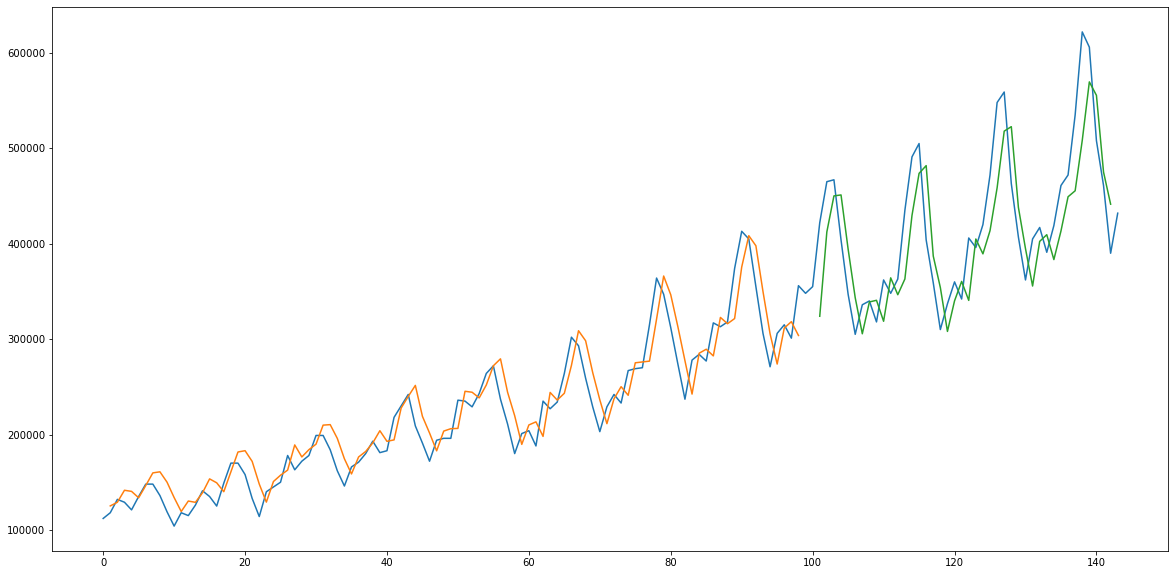

In [44]:

trainPredictPlot = np.empty_like(scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(scaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(scaled)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(20,10))
plt.plot(scaler.inverse_transform(scaled))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [45]:
#thank You